#**Osservazioni sulle vendite trimestrali di prodotti dei settori Calcio, Pesca e Casual**



In [1]:
#https://github.com/TommasoStrada/Progetto-Data-Science-Lab

The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models. The XGBoost algorithm performs well in machine learning competitions because of its robust handling of a variety of data types, relationships, distributions, and the variety of hyperparameters that you can fine-tune. You can use XGBoost for regression, classification (binary and multiclass), and ranking problems.

In [2]:
#!pip install xgboost 1.6

In [3]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost

In [4]:
shift_trimestre = 1     #trimestre precedente
shift_annuale = 4       #stesso trimestre, anno precedente
shift_scelto = shift_trimestre

In [5]:
repo_alessandro_calcio = "https://github.com/Alessandro-Fasani/DsLab/raw/main/calcio_trimestrale.csv"
repo_alessandro_pesca = "https://github.com/Alessandro-Fasani/DsLab/raw/main/pesca_trimestrale.csv"
repo_alessandro_casual = "https://github.com/Alessandro-Fasani/DsLab/raw/main/casual_trimestrale.csv"

repo_team_calcio = ""
repo_team_pesca = ""
repo_team_casual = ""

In [6]:
ds_calcio = pd.read_csv(repo_alessandro_calcio)
ds_pesca = pd.read_csv(repo_alessandro_pesca)
ds_casual = pd.read_csv(repo_alessandro_casual)

In [7]:
porzione_test = round(len(ds_calcio) * 0.2)       # 20% circa verra usato per il test  

ds_casual.head(50)

,Unnamed: 0,year,revenue
0,0,2014-03-31,618890.53
1,1,2014-06-30,886224.60
2,2,2014-09-30,1133497.77
3,3,2014-12-31,877819.29
4,4,2015-03-31,1661470.04
5,5,2015-06-30,1461337.48
6,6,2015-09-30,1415946.31
7,7,2015-12-31,1277021.07
8,8,2016-03-31,1307658.25
9,9,2016-06-30,1307577.72


In [8]:
ds_calcio['year'] = pd.to_datetime(ds_calcio['year'])
ds_pesca['year'] = pd.to_datetime(ds_pesca['year'])
ds_casual['year'] = pd.to_datetime(ds_casual['year'])
ds_calcio.dtypes

Unnamed: 0             int64
year          datetime64[ns]
revenue              float64
dtype: object

In [9]:
print("xgboost versione numero: ", xgboost.__version__)

xgboost versione numero:  0.90


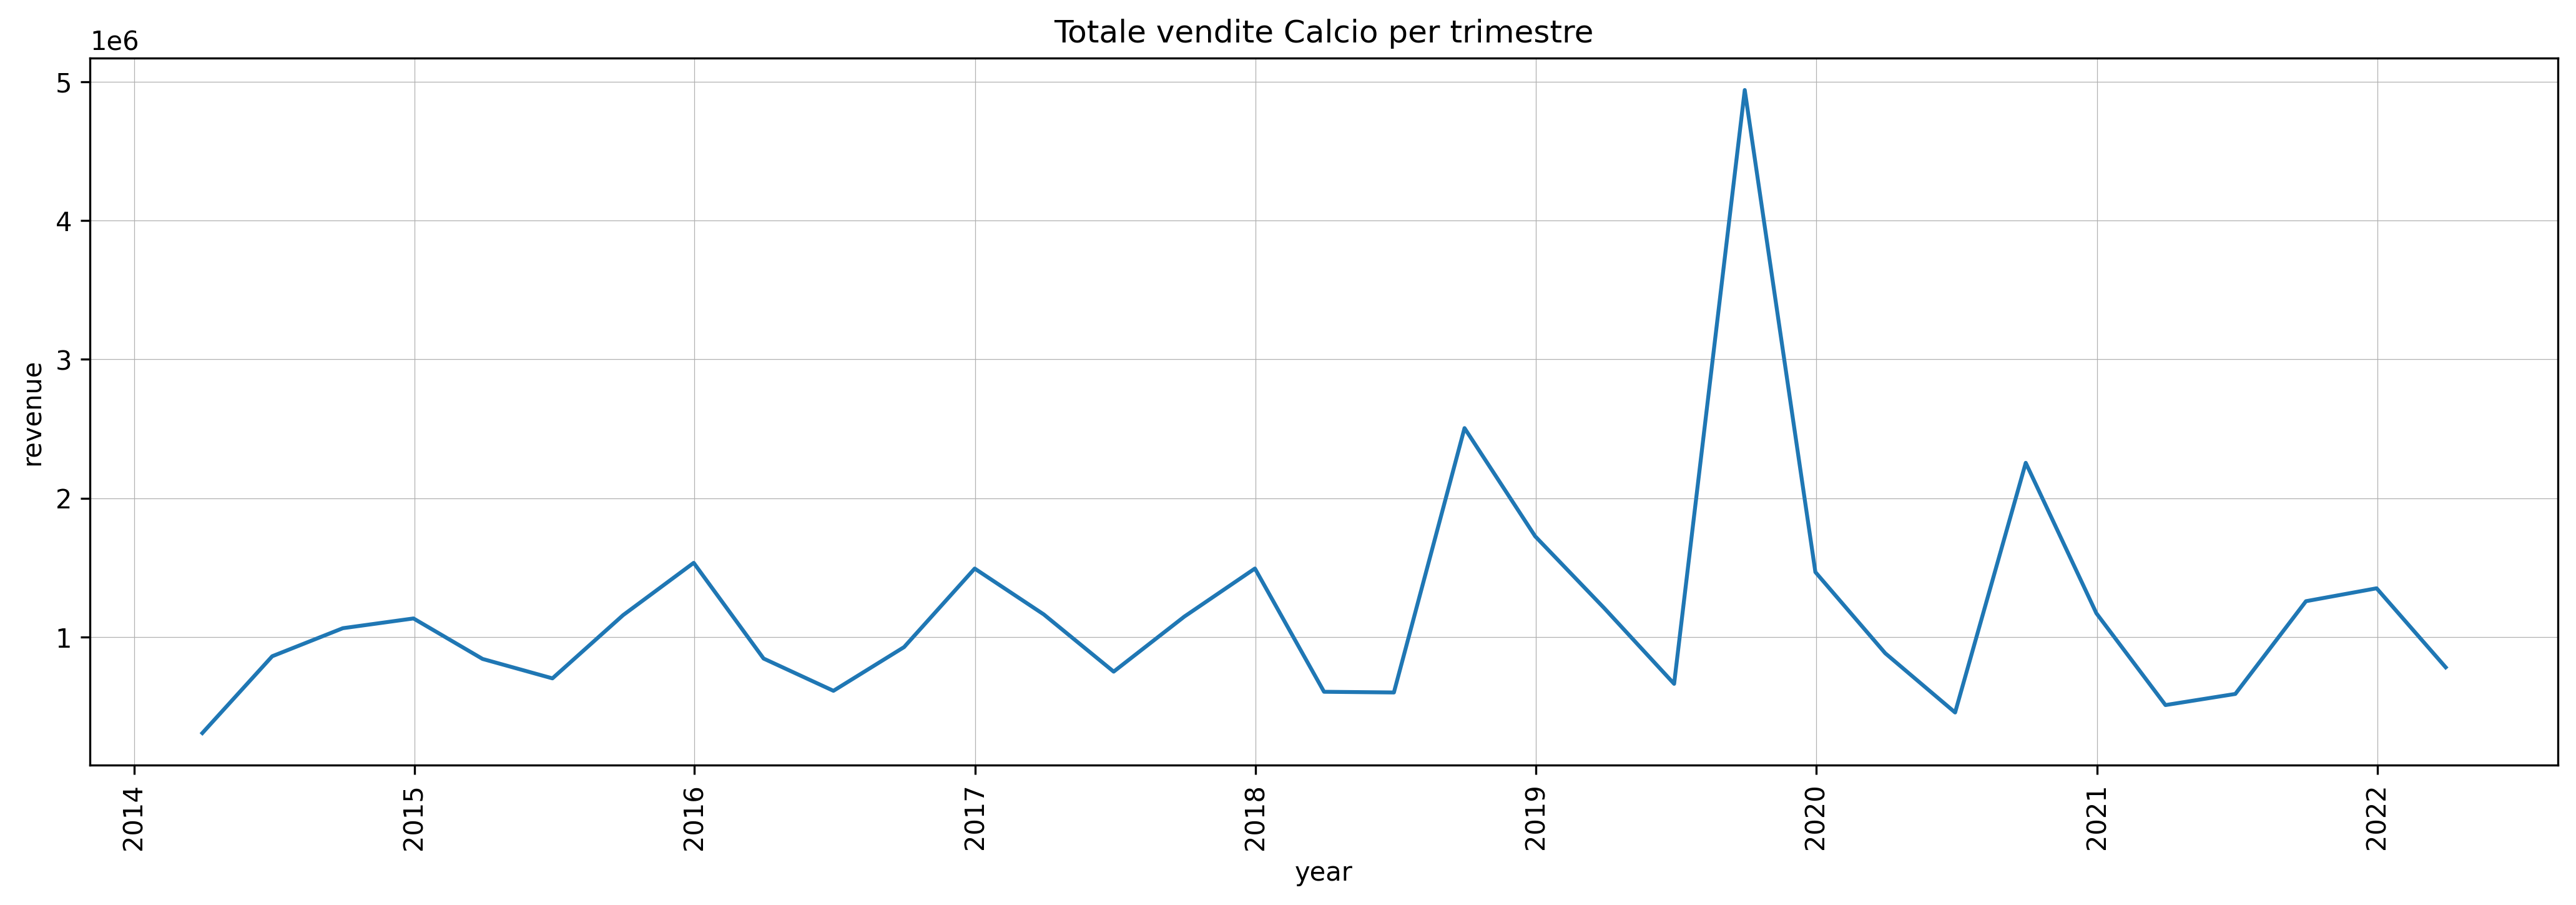

In [10]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Calcio per trimestre")
ax.tick_params(axis='x', rotation=90)

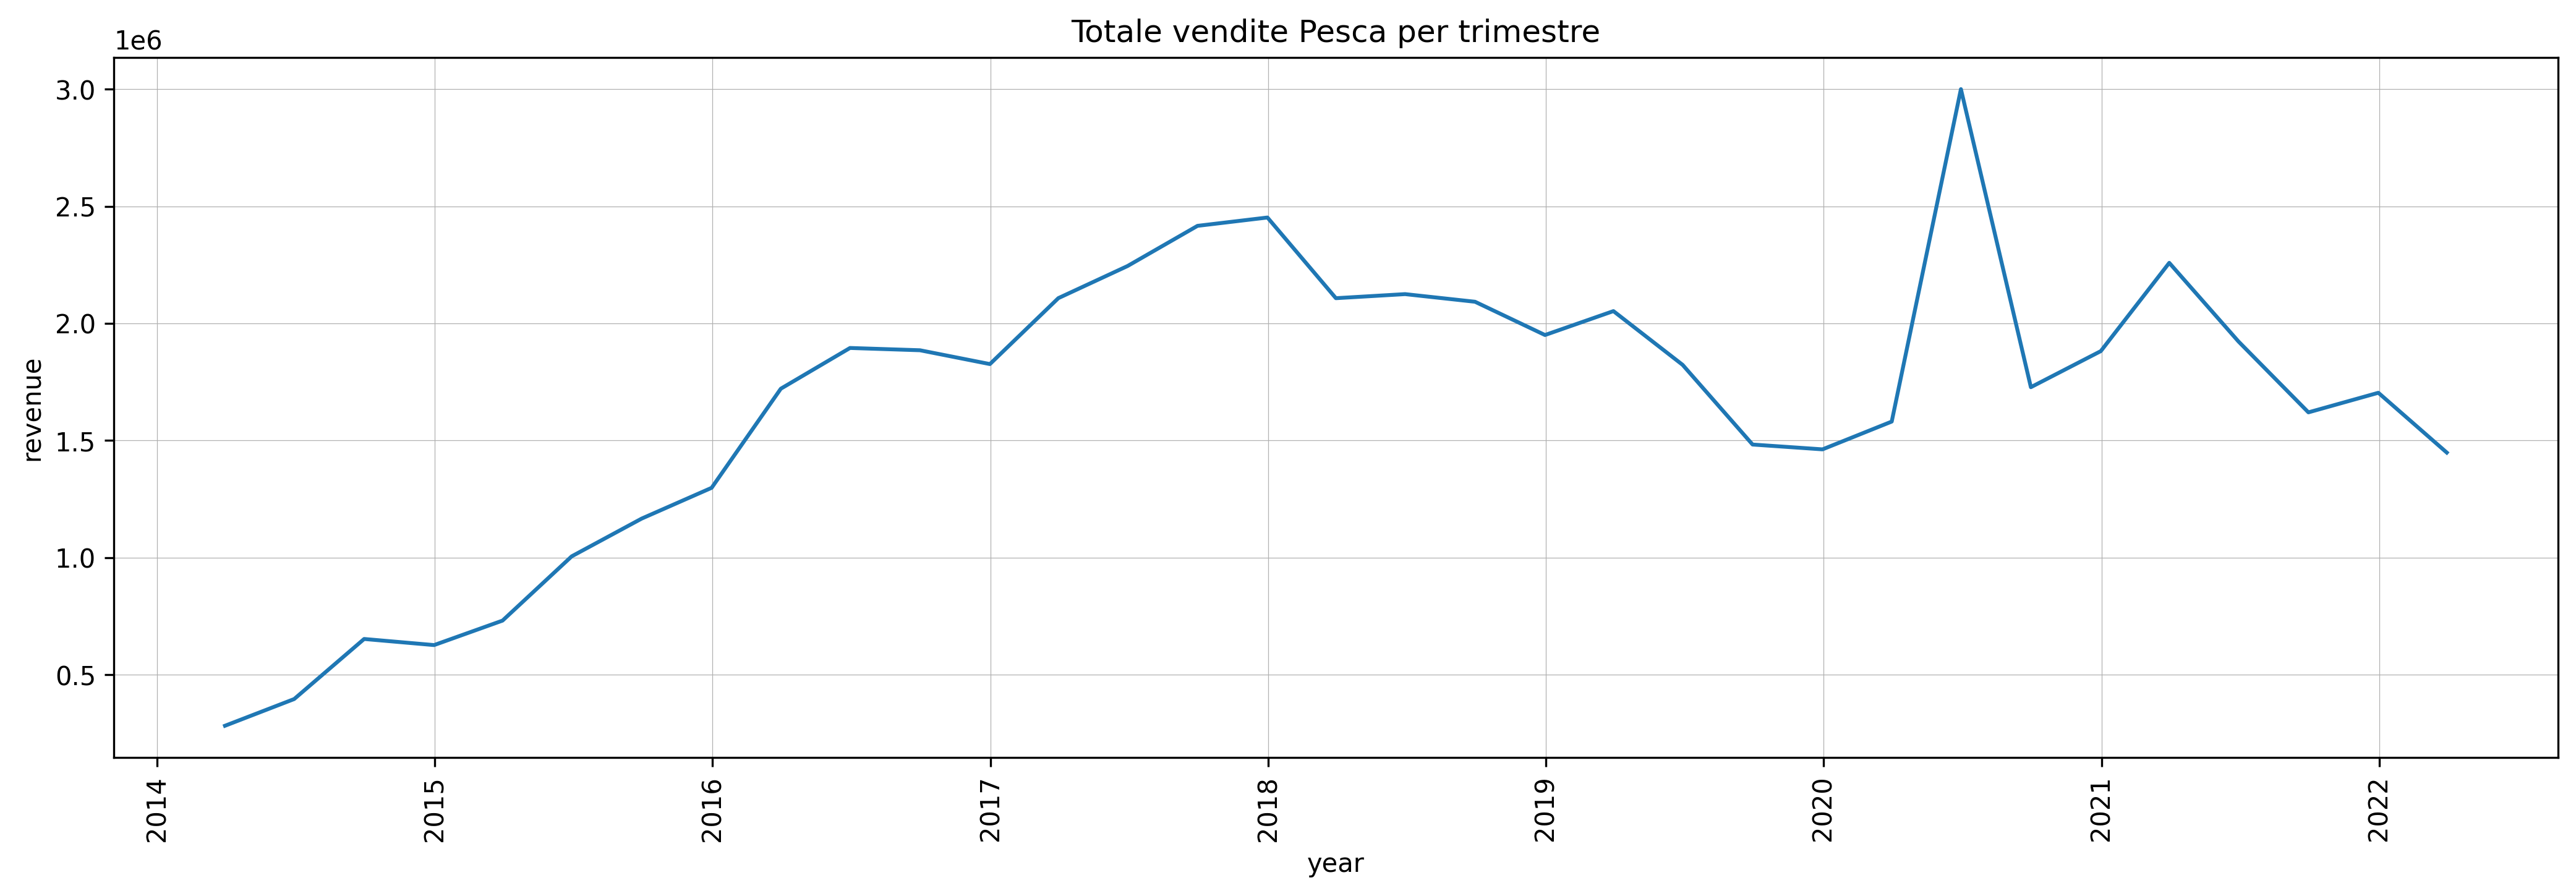

In [11]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Pesca per trimestre")
ax.tick_params(axis='x', rotation=90)

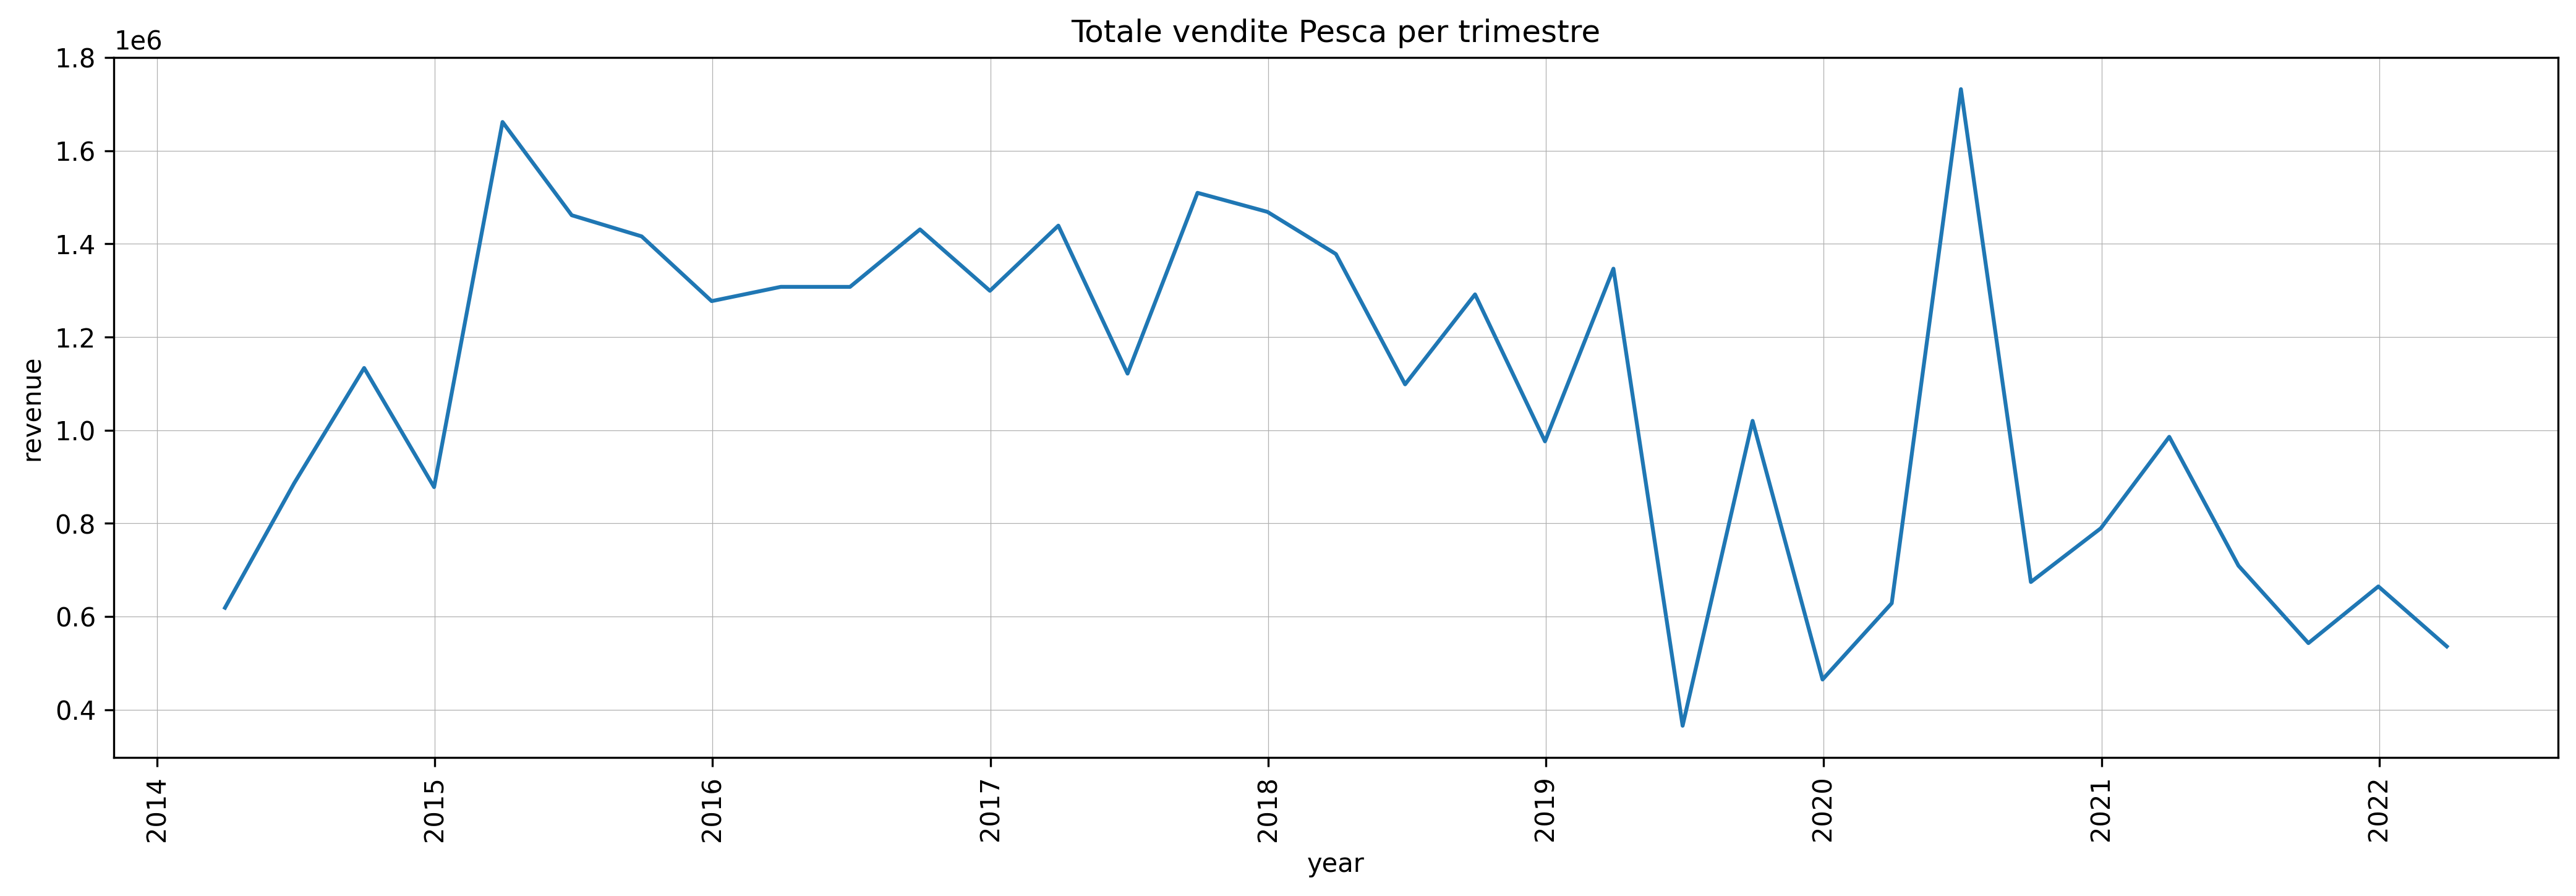

In [12]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x='year',  y='revenue')
plt.title("Totale vendite Pesca per trimestre")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [13]:
ds_calcio["totale_periodo_prec"] = ds_calcio["revenue"].shift(+shift_scelto)
ds_pesca["totale_periodo_prec"] = ds_pesca["revenue"].shift(+shift_scelto)
ds_casual["totale_periodo_prec"] = ds_casual["revenue"].shift(+shift_scelto)


ds_calcio= ds_calcio.dropna()  
ds_pesca= ds_pesca.dropna()    
ds_casual= ds_casual.dropna()


print(ds_calcio.shape)
print(ds_pesca.shape)
print(ds_casual.shape)

(32, 4)
(32, 4)
(32, 4)


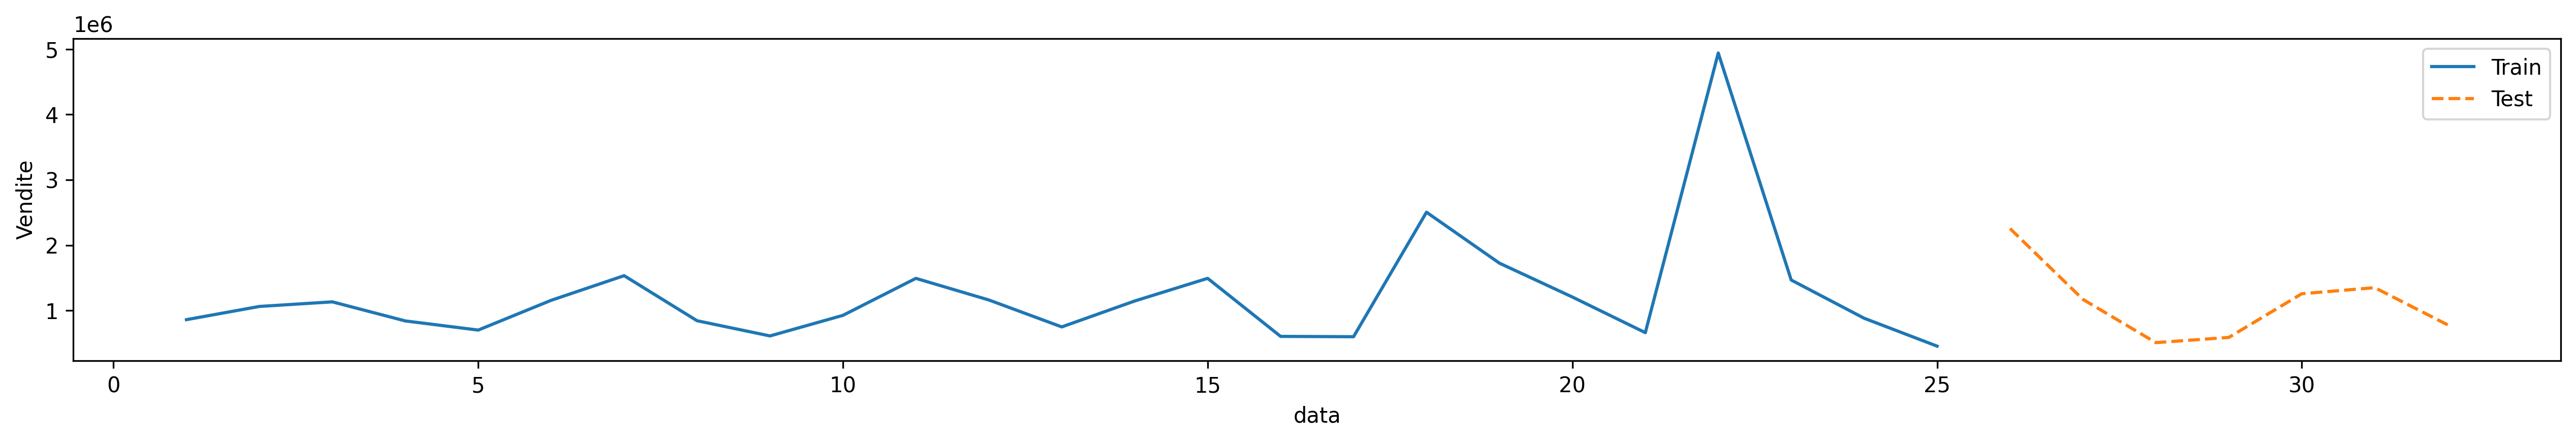

In [14]:
#LIST INPUT, divisione tra parte train e parte dedicata al test
x_calcio = ds_calcio[['totale_periodo_prec']]
x_pesca = ds_pesca[['totale_periodo_prec']]
x_casual = ds_casual[['totale_periodo_prec']]

x_calcio_to_train = x_calcio.iloc[:(len(x_calcio)-porzione_test)]
x_pesca_to_train = x_pesca.iloc[:(len(x_pesca)-porzione_test)]
x_casual_to_train = x_casual.iloc[:(len(x_casual)-porzione_test)]


x_calcio_to_test = x_calcio.iloc[(len(x_calcio)-porzione_test):]
x_pesca_to_test = x_pesca.iloc[(len(x_pesca)-porzione_test):]
x_casual_to_test = x_casual.iloc[(len(x_casual)-porzione_test):]


#LIST OUTPUT, divisione tra parte train e parte dedicata al test
y_calcio = ds_calcio[['revenue']]
y_pesca = ds_pesca[['revenue']]
y_casual = ds_casual[['revenue']]

y_calcio_to_train = y_calcio.iloc[:(len(y_calcio)-porzione_test)]
y_pesca_to_train = y_pesca.iloc[:(len(y_pesca)-porzione_test)]
y_casual_to_train = y_casual.iloc[:(len(y_casual)-porzione_test)]


y_calcio_to_test = y_calcio.iloc[(len(y_calcio)-porzione_test):]
y_pesca_to_test = y_pesca.iloc[(len(y_pesca)-porzione_test):]
y_casual_to_test = y_casual.iloc[(len(y_casual)-porzione_test):]


fig, ax = plt.subplots(figsize=(17, 3))
ax.plot(y_calcio_to_train, ls='-', label='Train')
ax.plot(y_calcio_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
estimator_calcio = XGBRegressor(objective='reg:squarederror', n_estimators=170, learning_rate=0.01)
estimator_pesca = XGBRegressor(objective='reg:squarederror', n_estimators=170, learning_rate=0.01)
estimator_casual = XGBRegressor(objective='reg:squarederror', n_estimators=170, learning_rate=0.01)

estimator_calcio.fit(x_calcio_to_train, y_calcio_to_train,
              eval_set=[(x_calcio_to_train, y_calcio_to_train), (x_calcio_to_test, y_calcio_to_test)],
              eval_metric='mae')

estimator_pesca.fit(x_pesca_to_train, y_pesca_to_train,
              eval_set=[(x_pesca_to_train, y_pesca_to_train), (x_pesca_to_test, y_pesca_to_test)],
              eval_metric='mae')

estimator_casual.fit(x_casual_to_train, y_casual_to_train,
              eval_set=[(x_casual_to_train, y_casual_to_train), (x_casual_to_test, y_casual_to_test)],
              eval_metric='mae')

[0]	validation_0-mae:1.22048e+06	validation_1-mae:1.12077e+06
[1]	validation_0-mae:1.21004e+06	validation_1-mae:1.11096e+06
[2]	validation_0-mae:1.19969e+06	validation_1-mae:1.10125e+06
[3]	validation_0-mae:1.18944e+06	validation_1-mae:1.09161e+06
[4]	validation_0-mae:1.17928e+06	validation_1-mae:1.08207e+06
[5]	validation_0-mae:1.1692e+06	validation_1-mae:1.07261e+06
[6]	validation_0-mae:1.15922e+06	validation_1-mae:1.06323e+06
[7]	validation_0-mae:1.14933e+06	validation_1-mae:1.05394e+06
[8]	validation_0-mae:1.13952e+06	validation_1-mae:1.04472e+06
[9]	validation_0-mae:1.1298e+06	validation_1-mae:1.03559e+06
[10]	validation_0-mae:1.12016e+06	validation_1-mae:1.02655e+06
[11]	validation_0-mae:1.11061e+06	validation_1-mae:1.01758e+06
[12]	validation_0-mae:1.10115e+06	validation_1-mae:1.00869e+06
[13]	validation_0-mae:1.09177e+06	validation_1-mae:999878
[14]	validation_0-mae:1.08247e+06	validation_1-mae:991146
[15]	validation_0-mae:1.07326e+06	validation_1-mae:982492
[16]	validation_0-m

XGBRegressor(learning_rate=0.01, n_estimators=170, objective='reg:squarederror')

In [16]:
predictions_calcio = estimator_calcio.predict(x_calcio_to_test)
predictions_pesca = estimator_pesca.predict(x_pesca_to_test)
predictions_casual = estimator_casual.predict(x_casual_to_test)

#ds_calcio_annuale = ds_calcio_annuale.reset_index().drop('index', axis=1)  #non posso usarli perchè me li aggiunge all'inizio del dataset
#ds_calcio_annuale['predictions'] = pd.Series(predictions)

#plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
#fig, ax = plt.subplots()
#sns.lineplot(data=ds_calcio_annuale, x= "year", y='revenue')
#sns.lineplot(data=ds_calcio_annuale, x='year', y='predictions', palette= "red")
#plt.grid(linestyle='-', linewidth=0.3)
#ax.tick_params(axis='x', rotation=90)

In [17]:
calcio_evalutation_ds = ds_calcio[(len(ds_calcio)-porzione_test):]   
calcio_evalutation_ds = calcio_evalutation_ds.reset_index().drop('index', axis=1)
calcio_evalutation_ds['predictions'] = pd.Series(predictions_calcio)
calcio_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,2254753.87,455953.91,1.146918e+06
1,27,2020-12-31,1170900.69,2254753.87,9.984099e+05
2,28,2021-03-31,509403.89,1170900.69,7.569002e+05
3,29,2021-06-30,589663.53,509403.89,1.146918e+06
4,30,2021-09-30,1257807.31,589663.53,1.146918e+06
5,31,2021-12-31,1350740.40,1257807.31,7.569002e+05
6,32,2022-03-31,781360.53,1350740.40,7.569002e+05


In [18]:
pesca_evalutation_ds = ds_pesca[(len(ds_pesca)-porzione_test):]  
pesca_evalutation_ds = pesca_evalutation_ds.reset_index().drop('index', axis=1)
pesca_evalutation_ds['predictions'] = pd.Series(predictions_pesca)
pesca_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,1727871.52,3000092.88,1666113.000
1,27,2020-12-31,1881887.80,1727871.52,1639987.625
2,28,2021-03-31,2258617.01,1881887.80,1651229.375
3,29,2021-06-30,1923040.08,2258617.01,1666113.000
4,30,2021-09-30,1620445.53,1923040.08,1651229.375
5,31,2021-12-31,1704044.85,1620445.53,1667159.625
6,32,2022-03-31,1448752.71,1704044.85,1639987.625


In [19]:
casual_evalutation_ds = ds_casual[(len(ds_casual)-porzione_test):]  
casual_evalutation_ds = casual_evalutation_ds.reset_index().drop('index', axis=1)
casual_evalutation_ds['predictions'] = pd.Series(predictions_casual)
casual_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,674152.55,1731979.27,1.021223e+06
1,27,2020-12-31,789520.75,674152.55,1.030637e+06
2,28,2021-03-31,985770.75,789520.75,1.030637e+06
3,29,2021-06-30,709238.48,985770.75,9.680299e+05
4,30,2021-09-30,543018.66,709238.48,1.030637e+06
5,31,2021-12-31,664677.44,543018.66,7.134047e+05
6,32,2022-03-31,535933.31,664677.44,1.030637e+06


In [20]:
#TROVARE UN VALUTATORE DELLE PERFORMANCE DI FITTING ANALOGO PER L'XGBOOST
#print('Did the model fit?', pd.Series(predictions_calcio).is_fitted) 
#print('AIC', pd.Series(predictions).aic) 
#print(pesca_evalutation_ds.summary())


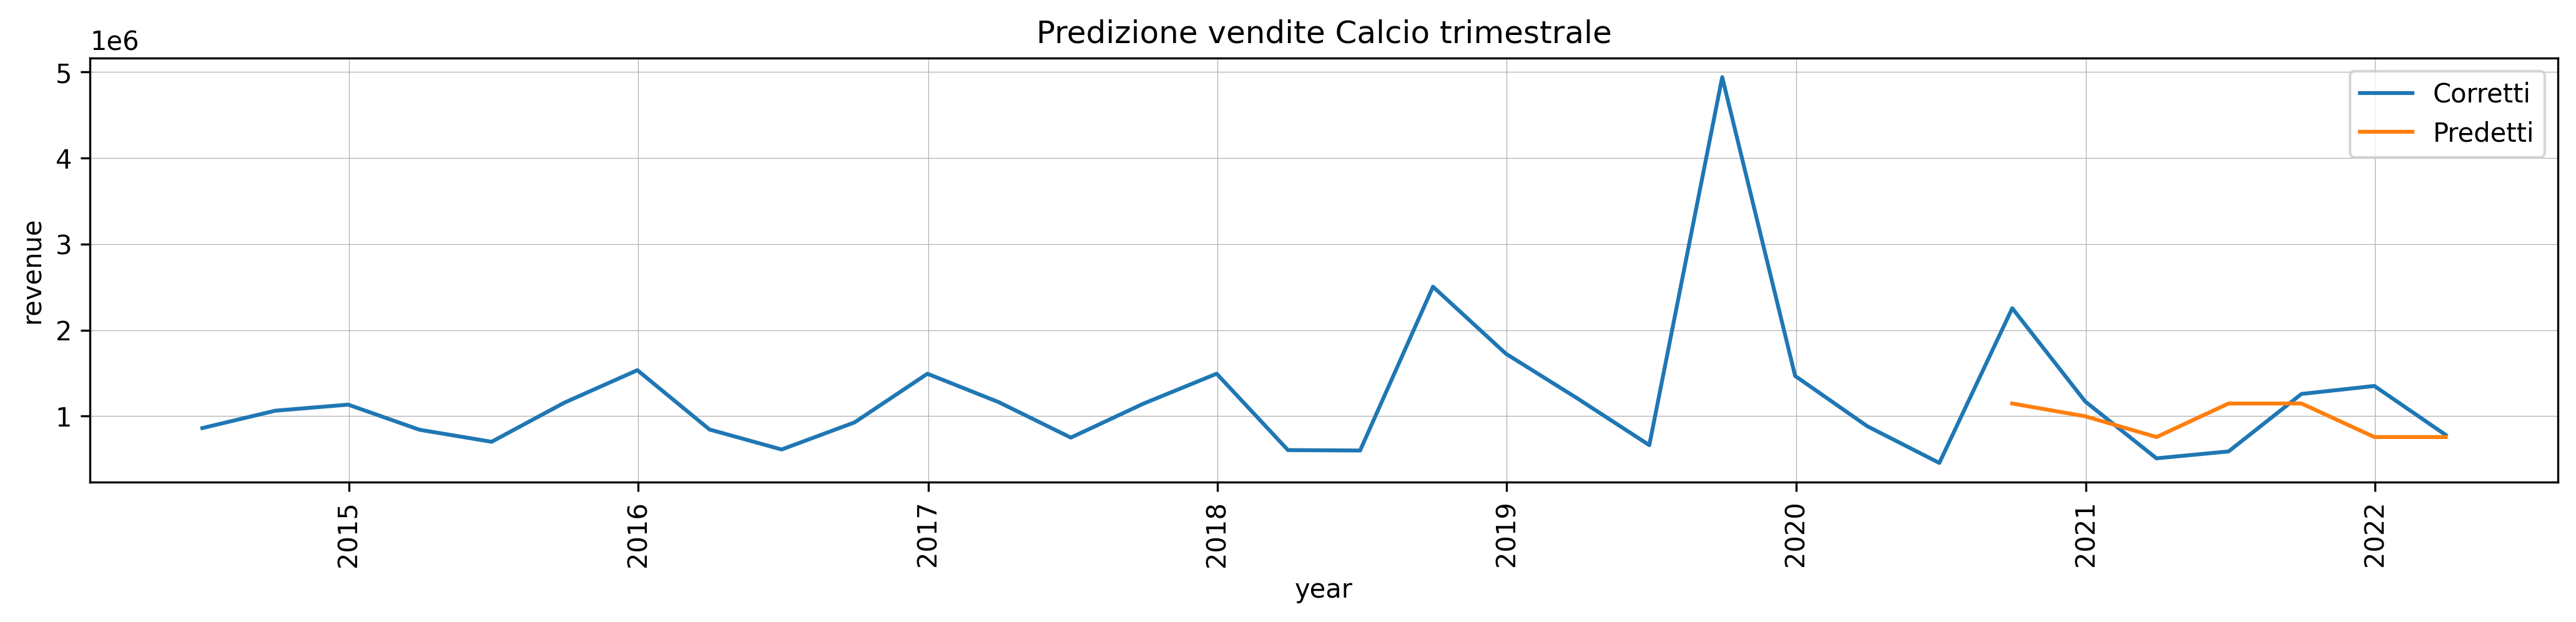

In [21]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x= "year", y='revenue', label= "Corretti" )     #_evalutation
sns.lineplot(data=calcio_evalutation_ds, x='year', y='predictions', palette= "red",  label= "Predetti")

#x = calcio_evalutation_ds['year']  
#y = calcio_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = calcio_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  calcio_evalutation_ds

plt.title("Predizione vendite Calcio trimestrale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

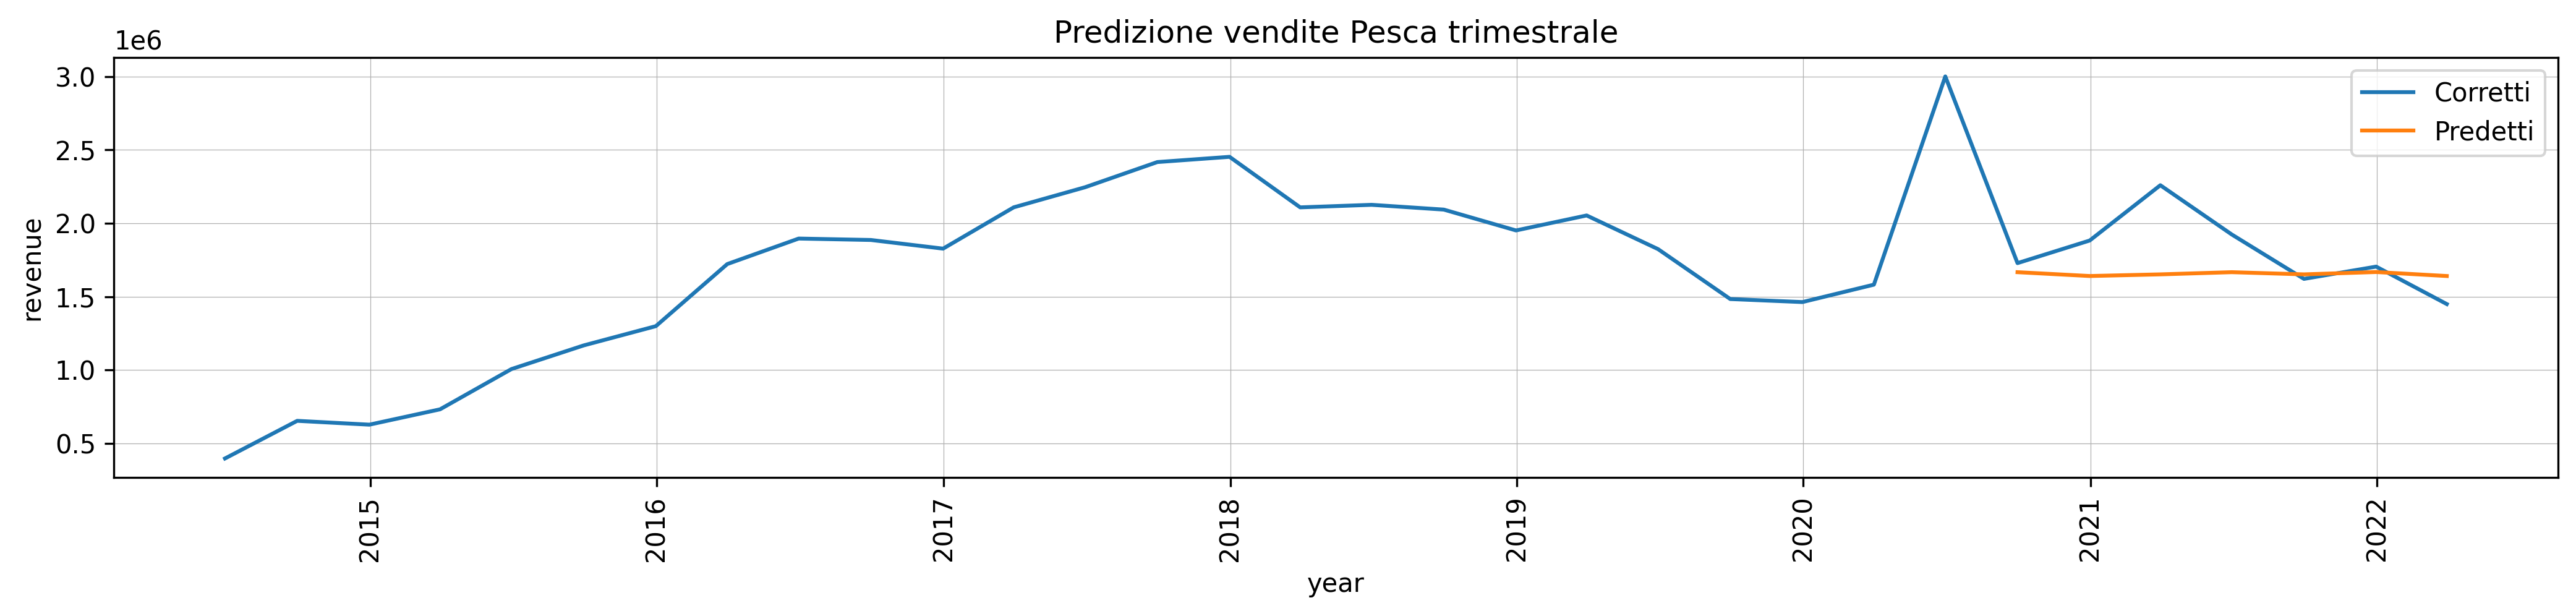

In [22]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=pesca_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = pesca_evalutation_ds['year']  
#y = pesca_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = pesca_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  pesca_evalutation_ds

plt.title("Predizione vendite Pesca trimestrale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

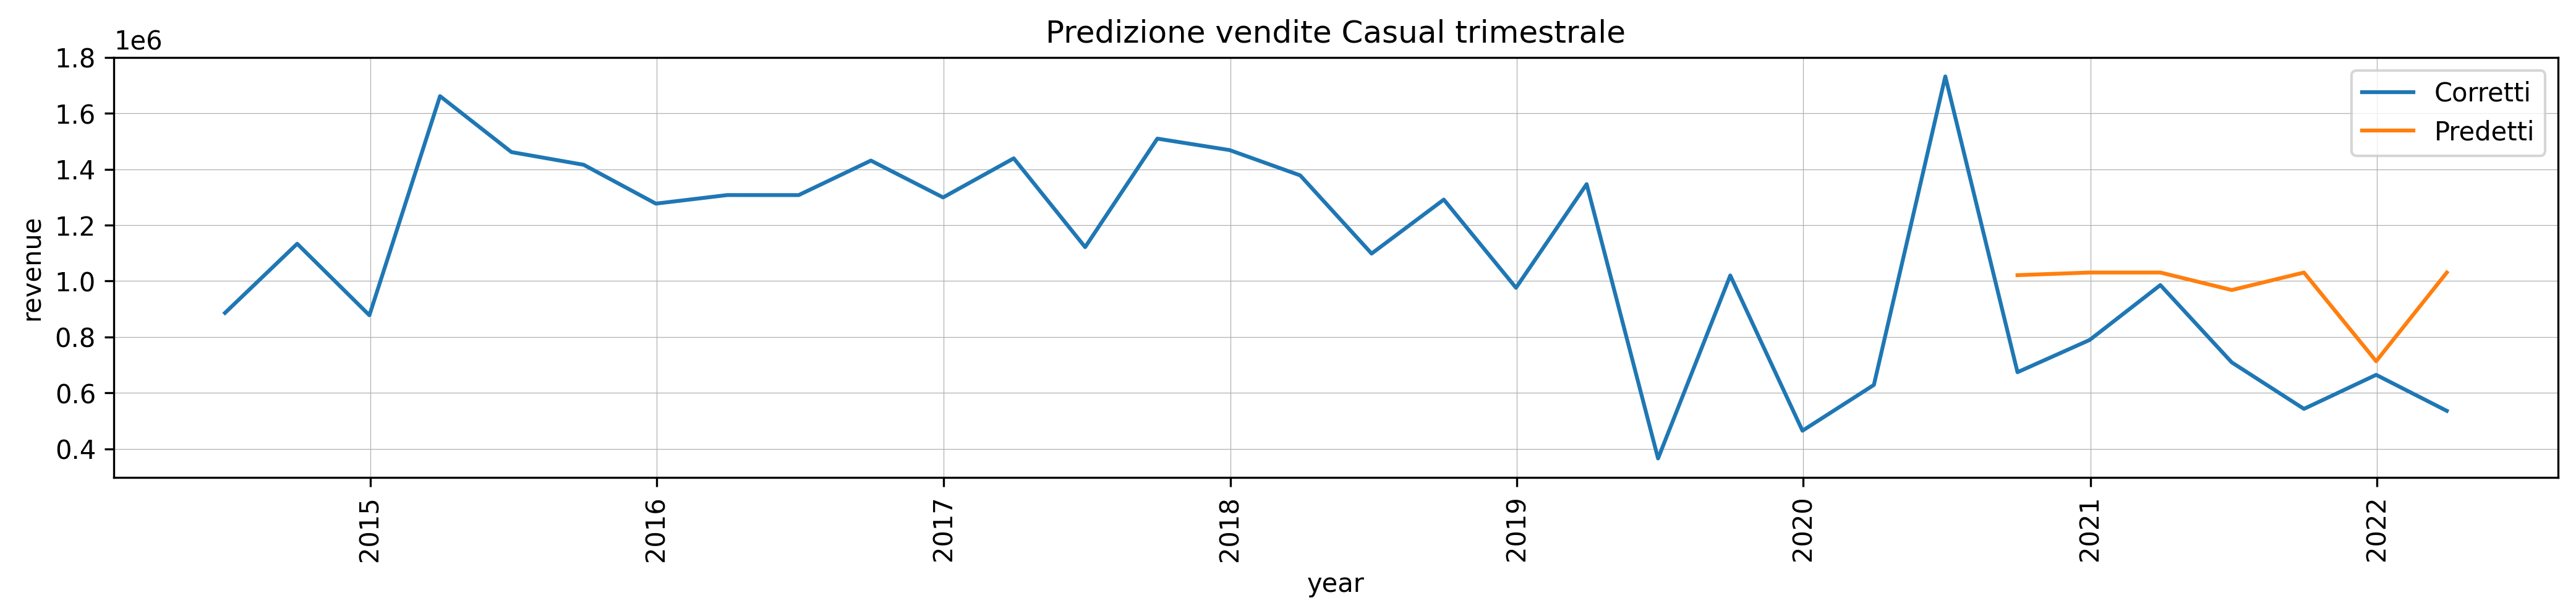

In [23]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=casual_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = casual_evalutation_ds['year']  
#y = casual_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = casual_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  casual_evalutation_ds

plt.title("Predizione vendite Casual trimestrale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [24]:
calcio_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,2254753.87,455953.91,1.146918e+06
1,27,2020-12-31,1170900.69,2254753.87,9.984099e+05
2,28,2021-03-31,509403.89,1170900.69,7.569002e+05
3,29,2021-06-30,589663.53,509403.89,1.146918e+06
4,30,2021-09-30,1257807.31,589663.53,1.146918e+06
5,31,2021-12-31,1350740.40,1257807.31,7.569002e+05
6,32,2022-03-31,781360.53,1350740.40,7.569002e+05


In [25]:
pesca_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,1727871.52,3000092.88,1666113.000
1,27,2020-12-31,1881887.80,1727871.52,1639987.625
2,28,2021-03-31,2258617.01,1881887.80,1651229.375
3,29,2021-06-30,1923040.08,2258617.01,1666113.000
4,30,2021-09-30,1620445.53,1923040.08,1651229.375
5,31,2021-12-31,1704044.85,1620445.53,1667159.625
6,32,2022-03-31,1448752.71,1704044.85,1639987.625


In [26]:
casual_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,26,2020-09-30,674152.55,1731979.27,1.021223e+06
1,27,2020-12-31,789520.75,674152.55,1.030637e+06
2,28,2021-03-31,985770.75,789520.75,1.030637e+06
3,29,2021-06-30,709238.48,985770.75,9.680299e+05
4,30,2021-09-30,543018.66,709238.48,1.030637e+06
5,31,2021-12-31,664677.44,543018.66,7.134047e+05
6,32,2022-03-31,535933.31,664677.44,1.030637e+06


In [27]:
print('Calcio XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(calcio_evalutation_ds["revenue"] - calcio_evalutation_ds["predictions"])))

Calcio XgBoost Mean Absolute Error (MAE):  402038.1882142857


In [28]:
print('Pesca XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(pesca_evalutation_ds["revenue"] - pesca_evalutation_ds["predictions"])))

Pesca XgBoost Mean Absolute Error (MAE):  203839.62785714286


In [29]:
print('Casual XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(casual_evalutation_ds["revenue"] - casual_evalutation_ds["predictions"])))

Casual XgBoost Mean Absolute Error (MAE):  274699.1782142857


In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
print('Calcio XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(calcio_evalutation_ds["revenue"], calcio_evalutation_ds["predictions"]))

Calcio XgBoost Mean Absolute Percentage Error (MAPE):  37.55209786845043


In [32]:
print('Pesca XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(pesca_evalutation_ds["revenue"], pesca_evalutation_ds["predictions"]))

Pesca XgBoost Mean Absolute Percentage Error (MAPE):  10.563587158567701


In [33]:
print('Casual XgBoost Mean Absolute Percentage Error (MAPE): ', mean_absolute_percentage_error(casual_evalutation_ds["revenue"], casual_evalutation_ds["predictions"]))

Casual XgBoost Mean Absolute Percentage Error (MAPE):  44.64254060958241


(170 estimator valore intermedio per tutti e tre i dataset con shift di 1 mese) 

(Calcio migliore intorno ai 200)
(Pesca migliore intorno ai 180)
(Casual migliore intorno ai 90)




Con shift +1 trimestre


* Calcio XgBoost Mean Absolute Error (MAE):  402038.1882142857
* Pesca XgBoost Mean Absolute Error (MAE):  203839.62785714286
* Casual XgBoost Mean Absolute Error (MAE):  274699.1782142857


* Calcio XgBoost Mean Absolute Percentage Error (MAPE):  37.55 %
* Pesca XgBoost Mean Absolute Percentage Error (MAPE):  10.56 % 
* Casual XgBoost Mean Absolute Percentage Error (MAPE):  44.64 %




Con shift +4 trimestri


* Calcio XgBoost Mean Absolute Error (MAE):  443181.4224999999
* Pesca XgBoost Mean Absolute Error (MAE):  245233.77785714282
* Casual XgBoost Mean Absolute Error (MAE):  261661.8442857143


* Calcio XgBoost Mean Absolute Percentage Error (MAPE):  37.31 %
* Pesca XgBoost Mean Absolute Percentage Error (MAPE):  12.79 %
* Casual XgBoost Mean Absolute Percentage Error (MAPE):  40.15 %